In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# BETTER
def analyze_channel_schedule(file_path):
    # Load dataset
    df = pd.read_csv(file_path)

    # Rename 'Unnamed: 0' to 'Date-Time' if necessary
    if 'Unnamed: 0' in df.columns:
        df.rename(columns={'Unnamed: 0': 'Date-Time'}, inplace=True)

    # Convert 'Date-Time' to datetime format
    df['Date-Time'] = pd.to_datetime(df['Date-Time'], errors='coerce')

    # Display basic info
    print("\nFirst few rows of the dataset:")
    print(df.head())
    print("\nDataset information:")
    df.info()
    print("\nSummary statistics:")
    print(df.describe())
    print("\nMissing values per column:")
    print(df.isnull().sum())

    # Distribution of content types (Movie/Advert)
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x='content_type')
    plt.title('Content Type Distribution')
    plt.xlabel('Content Type')
    plt.ylabel('Count')
    plt.show()

    # Analyze ad cost over time
    ad_costs = df[df['content_type'] == 'Advert'].groupby('Date-Time')['ad_slot_price'].mean().reset_index()
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=ad_costs, x='Date-Time', y='ad_slot_price')
    plt.title('Average Ad Slot Price Over Time')
    plt.xlabel('Date-Time')
    plt.ylabel('Average Ad Slot Price')
    plt.xticks(rotation=45)
    plt.show()

    # Distribution of movie popularity factors and budget
    plt.figure(figsize=(8, 4))
    sns.histplot(df['movie_popularity_factor'], kde=True, bins=20)
    plt.title('Movie Popularity Factor Distribution')
    plt.xlabel('Popularity Factor')
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(8, 4))
    sns.histplot(df['movie_budget'], kde=True, bins=20)
    plt.title('Movie Budget Distribution')
    plt.xlabel('Budget')
    plt.ylabel('Frequency')
    plt.show()

    # Analyze time-based trends (Movies vs. Ads over time)
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='Date-Time', y='movie_popularity_factor', label='Movie Popularity')
    sns.lineplot(data=df[df['content_type'] == 'Advert'], x='Date-Time', y='prime_time_factor', label='Prime Time Factor (Adverts)')
    plt.title('Movie Popularity and Prime Time Factor Over Time')
    plt.xlabel('Date-Time')
    plt.ylabel('Popularity/Prime Time Factor')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

    # Plot view counts for each audience type (Baseline vs. Expected vs. True)
    age_groups = ['children', 'adults', 'retirees']
    for group in age_groups:
        plt.figure(figsize=(12, 6))
        sns.lineplot(data=df, x='Date-Time', y=f'{group}_baseline_view_count', label=f'{group.capitalize()} Baseline')
        sns.lineplot(data=df, x='Date-Time', y=f'{group}_expected_view_count', label=f'{group.capitalize()} Expected')
        for i in range(10):  # True view counts from 0 to 9
            sns.lineplot(data=df, x='Date-Time', y=f'{group}_true_view_count_{i}', label=f'{group.capitalize()} True {i}', alpha=0.1)
        plt.title(f'{group.capitalize()} View Counts Over Time')
        plt.xlabel('Date-Time')
        plt.ylabel(f'{group.capitalize()} View Counts')
        plt.legend()
        plt.xticks(rotation=45)
        plt.show()

    # Ad breaks and prime time factor impact
    plt.figure(figsize=(8, 4))
    sns.histplot(df['n_ad_breaks'], kde=True, bins=10)
    plt.title('Distribution of Ad Breaks')
    plt.xlabel('Number of Ad Breaks')
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(8, 4))
    sns.histplot(df['prime_time_factor'], kde=True, bins=10)
    plt.title('Prime Time Factor Distribution')
    plt.xlabel('Prime Time Factor')
    plt.ylabel('Frequency')
    plt.show()

    # Ad Slot Price Analysis
    plt.figure(figsize=(8, 4))
    sns.histplot(df['ad_slot_price'].dropna(), kde=True, bins=20)
    plt.title('Ad Slot Price Distribution')
    plt.xlabel('Ad Slot Price')
    plt.ylabel('Frequency')
    plt.show()

    # Exclude non-numeric columns for the correlation matrix
    numeric_df = df.select_dtypes(include='float64')  # Select only float64 type columns
    
    # Calculate the correlation matrix
    correlation_matrix = numeric_df.corr()
    
    # Plotting the correlation matrix
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()

    # Calculate number of movies and adverts
    num_movies = df[df['content_type'] == 'Movie'].shape[0]
    num_adverts = df[df['content_type'] == 'Advert'].shape[0]
    ratio = num_adverts / num_movies if num_movies > 0 else float('inf')  # Prevent division by zero

    print(f"Number of Movies: {num_movies}")
    print(f"Number of Adverts: {num_adverts}")
    print(f"Ratio of Adverts to Movies: {ratio:.2f}")

    print("\nAnalysis Complete.")


First few rows of the dataset:
            Date-Time           content content_type  movie_popularity_factor  \
0 2024-10-01 07:00:00  The Skeleton Key        Movie                 0.439117   
1 2024-10-01 07:05:00            Advert       Advert                 0.439117   
2 2024-10-01 07:10:00  The Skeleton Key        Movie                 0.439117   
3 2024-10-01 07:15:00  The Skeleton Key        Movie                 0.439117   
4 2024-10-01 07:20:00  The Skeleton Key        Movie                 0.439117   

   children_popularity_factor  adults_popularity_factor  \
0                    0.175647                  0.439117   
1                    0.175647                  0.439117   
2                    0.175647                  0.439117   
3                    0.175647                  0.439117   
4                    0.175647                  0.439117   

   retirees_popularity_factor  movie_budget  box_office_revenue  n_ad_breaks  \
0                    0.351294    43000000.0   

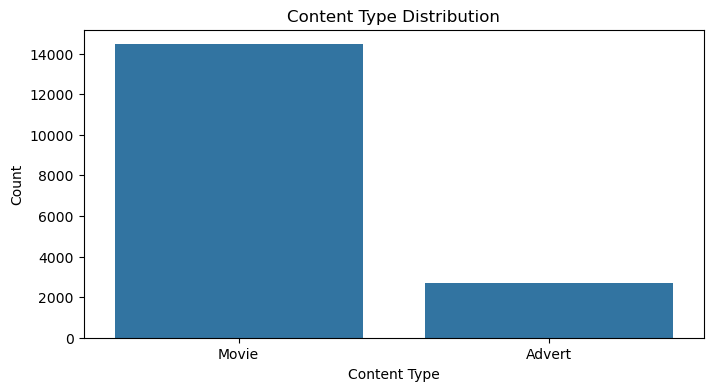

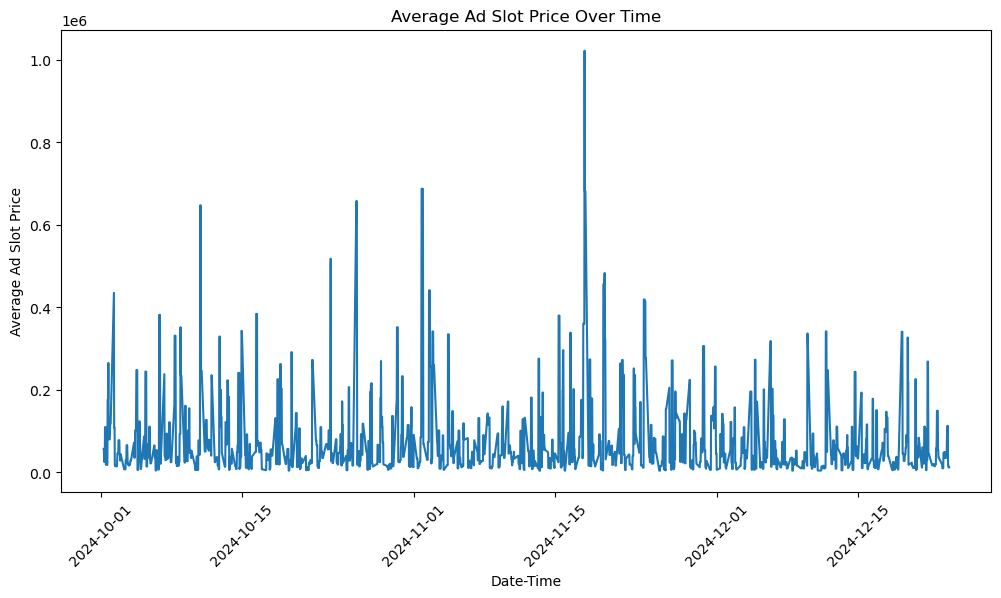

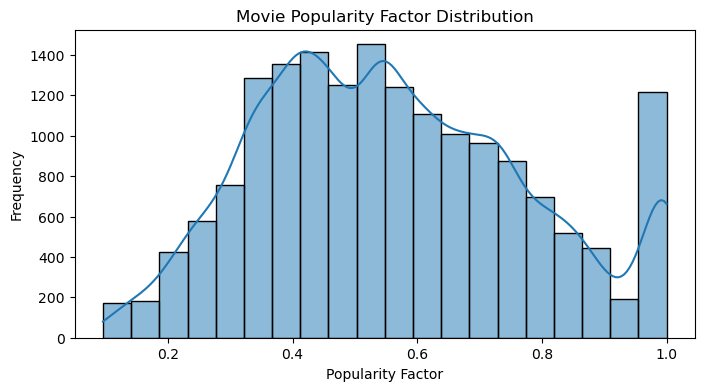

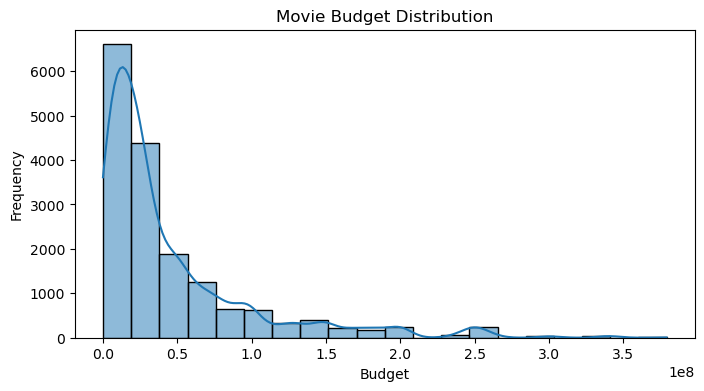

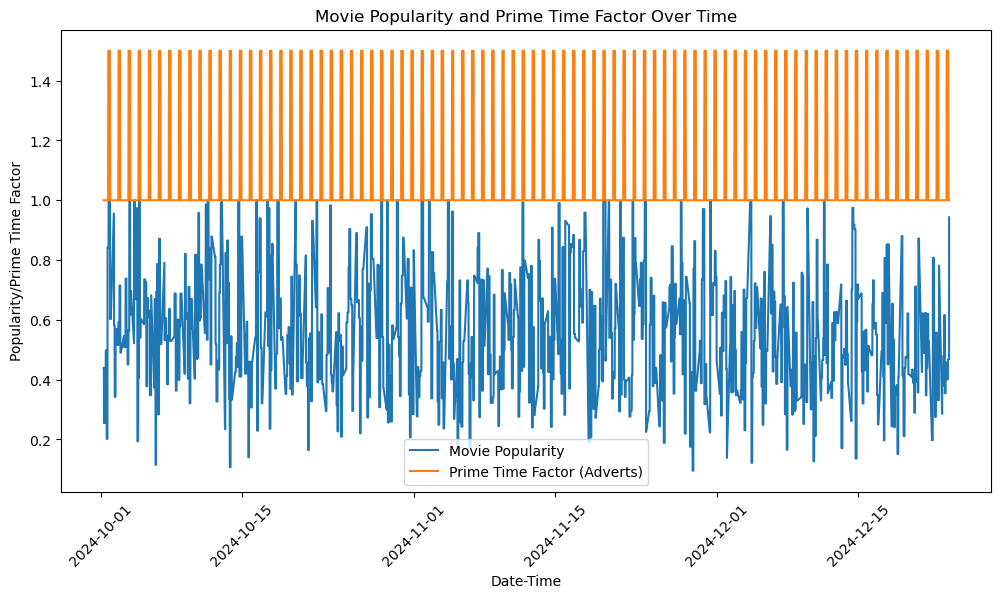

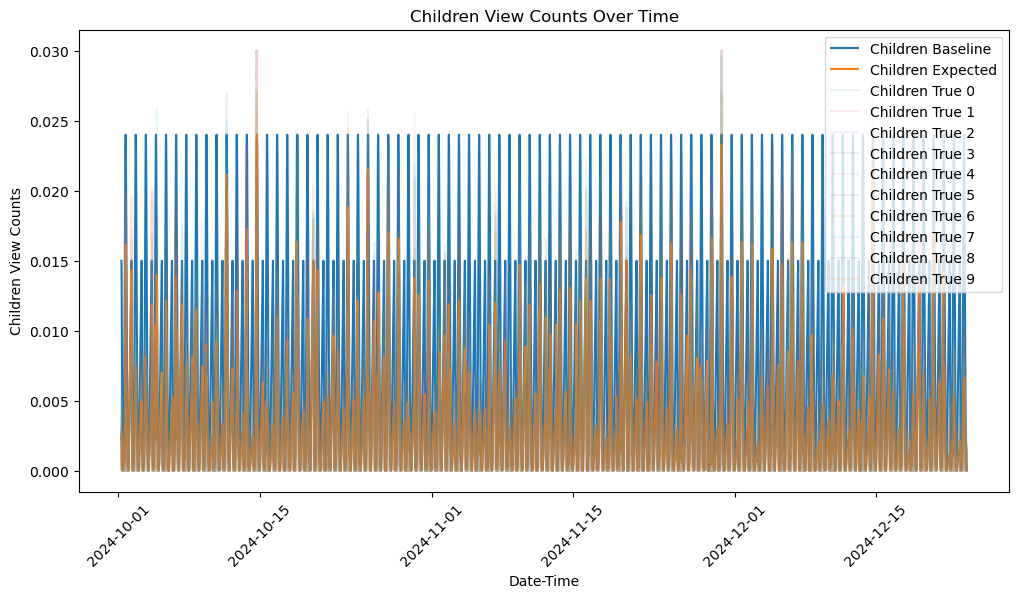

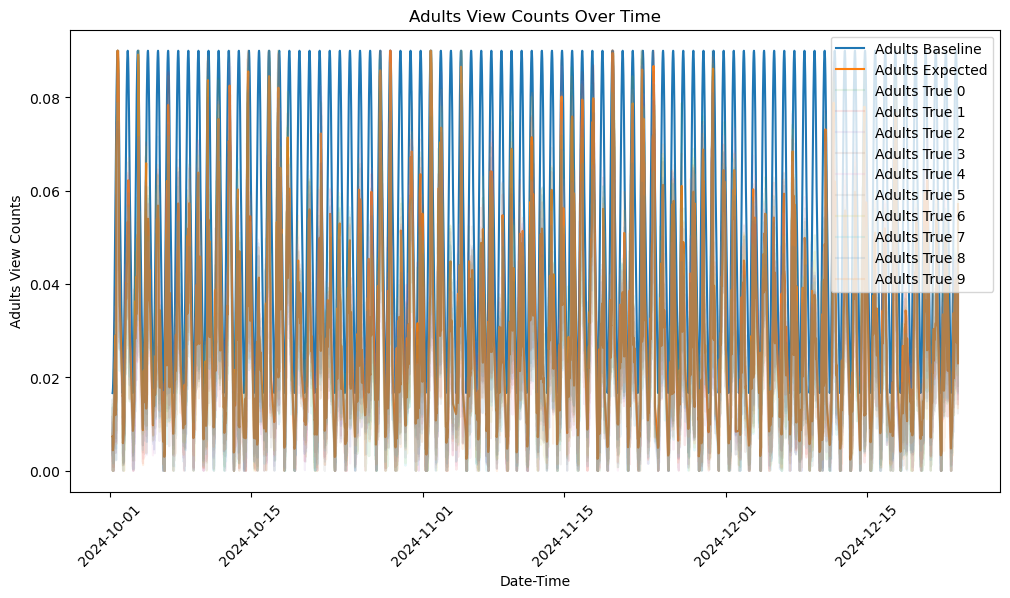

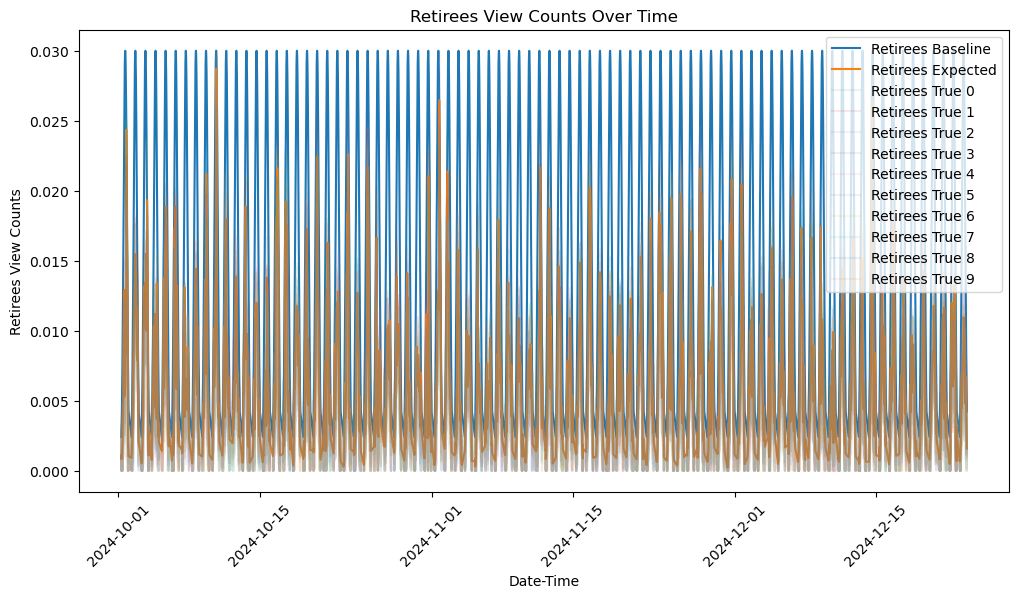

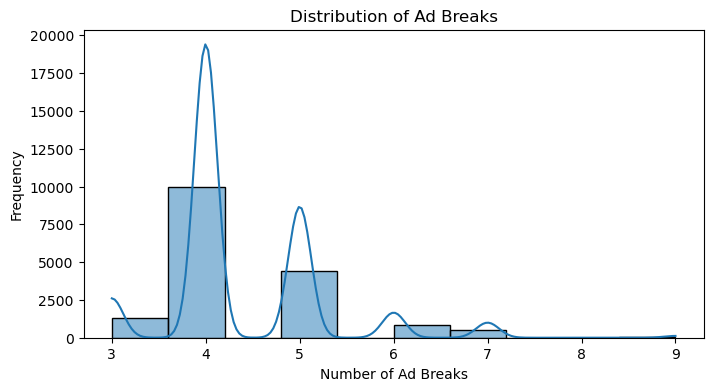

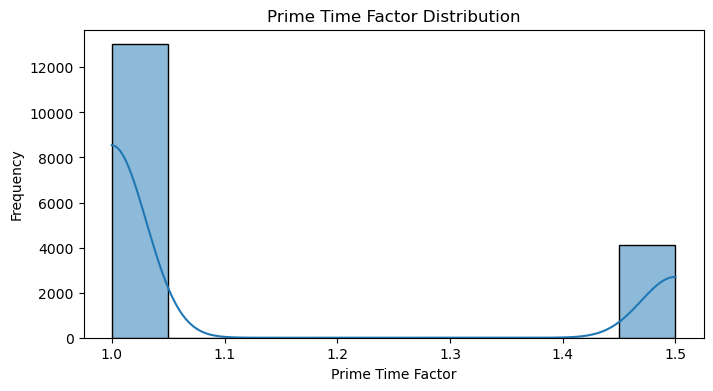

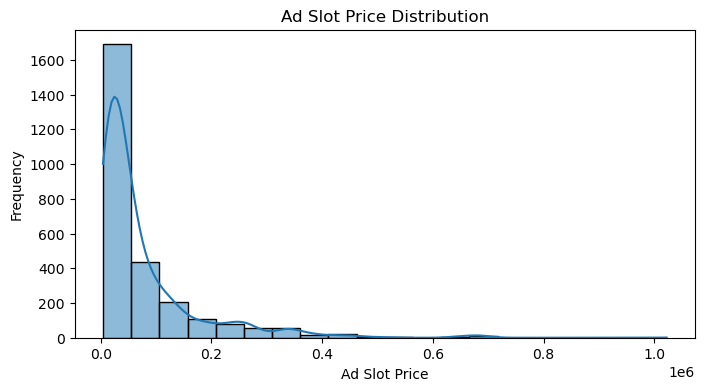

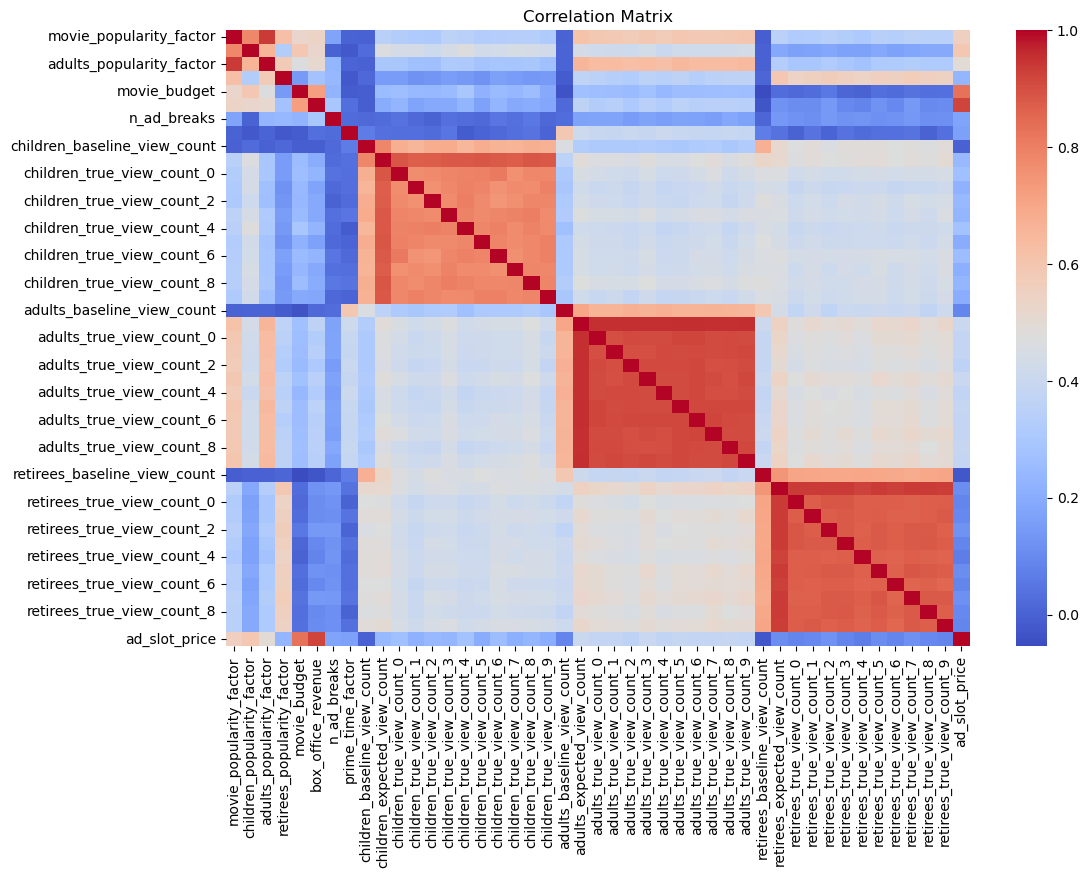

Number of Movies: 14453
Number of Adverts: 2683
Ratio of Adverts to Movies: 0.19

Analysis Complete.


In [18]:
analyze_channel_schedule("data/channel_0_schedule.csv")


First few rows of the dataset:
            Date-Time   content content_type  movie_popularity_factor  \
0 2024-10-01 07:00:00  Cop Land        Movie                 0.448213   
1 2024-10-01 07:05:00    Advert       Advert                 0.448213   
2 2024-10-01 07:10:00  Cop Land        Movie                 0.448213   
3 2024-10-01 07:15:00  Cop Land        Movie                 0.448213   
4 2024-10-01 07:20:00  Cop Land        Movie                 0.448213   

   children_popularity_factor  adults_popularity_factor  \
0                    0.179285                  0.448213   
1                    0.179285                  0.448213   
2                    0.179285                  0.448213   
3                    0.179285                  0.448213   
4                    0.179285                  0.448213   

   retirees_popularity_factor  movie_budget  box_office_revenue  n_ad_breaks  \
0                    0.448213    15000000.0          44862187.0          4.0   
1             

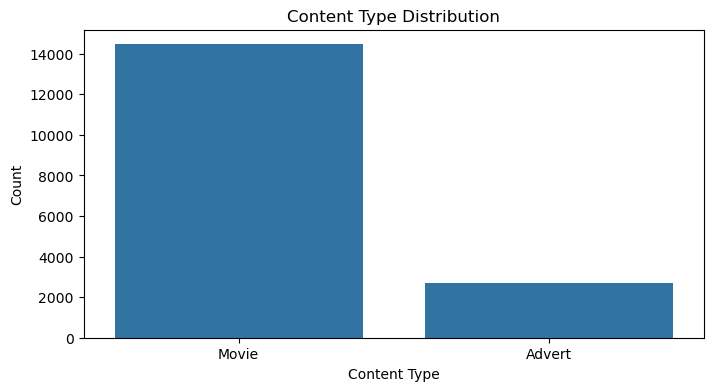

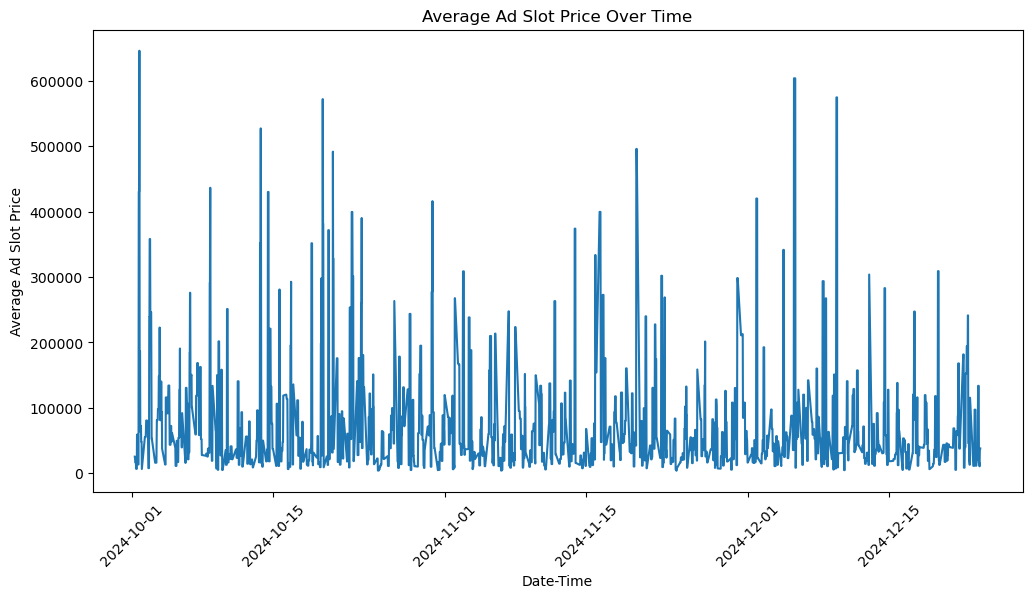

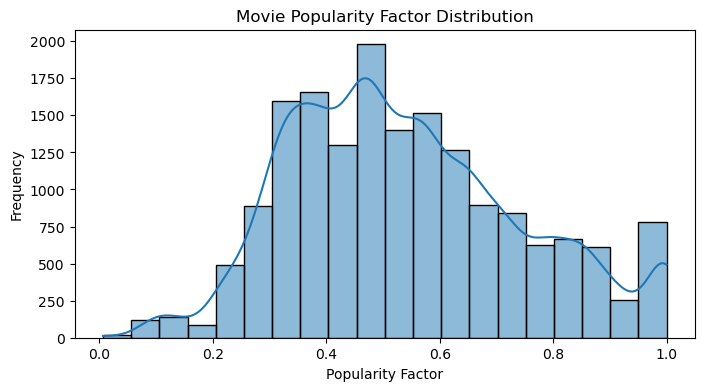

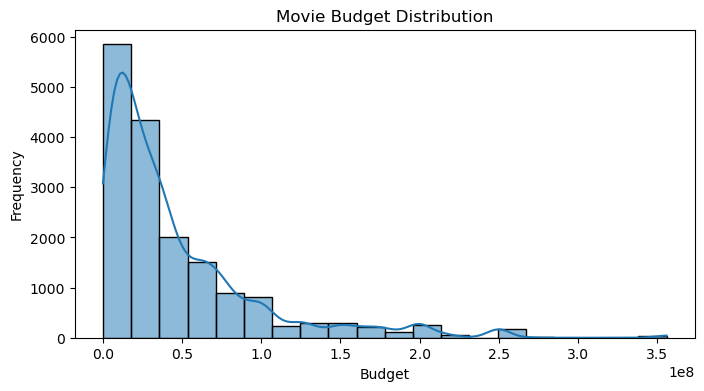

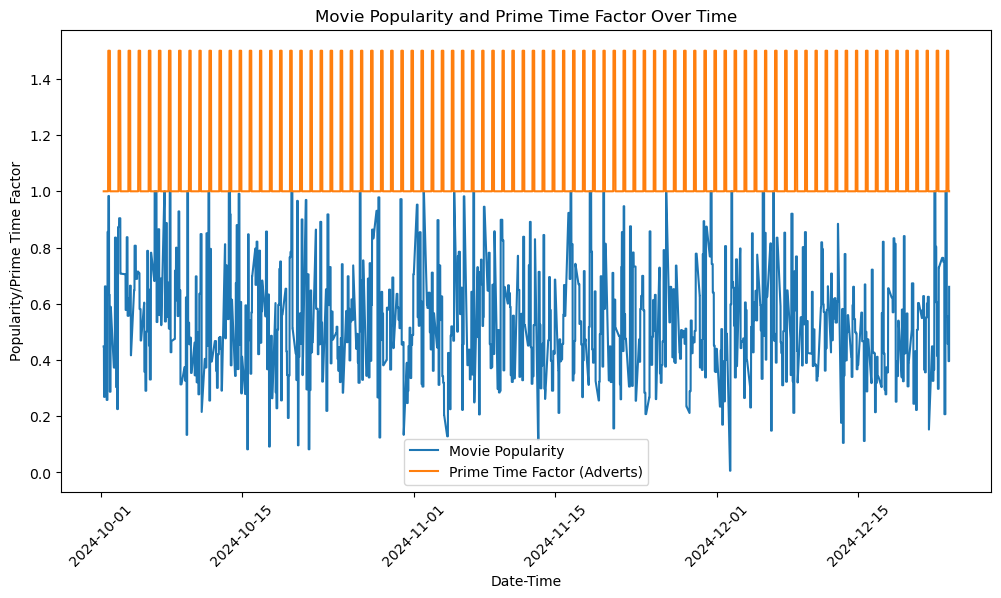

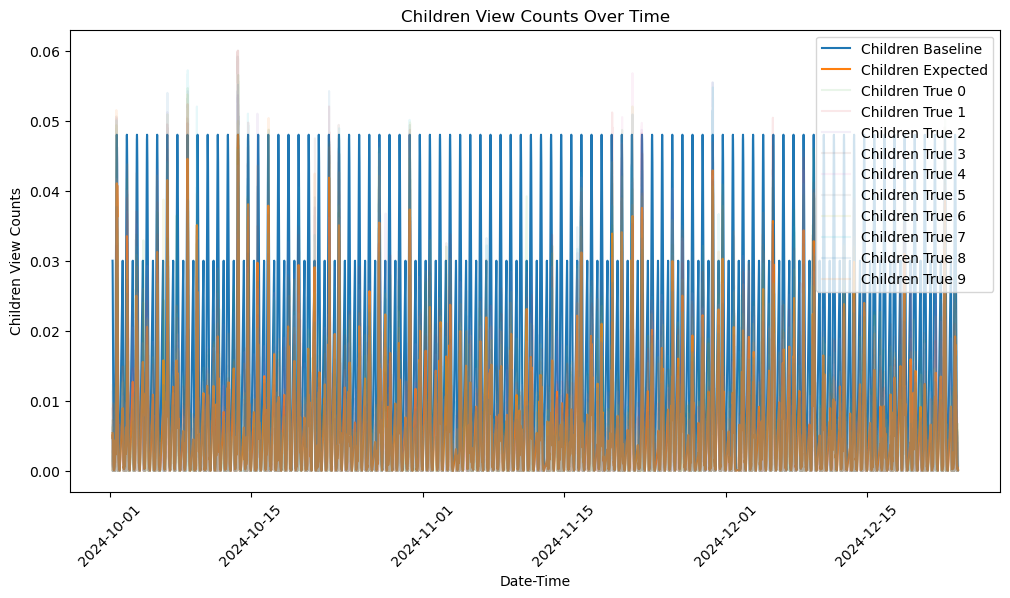

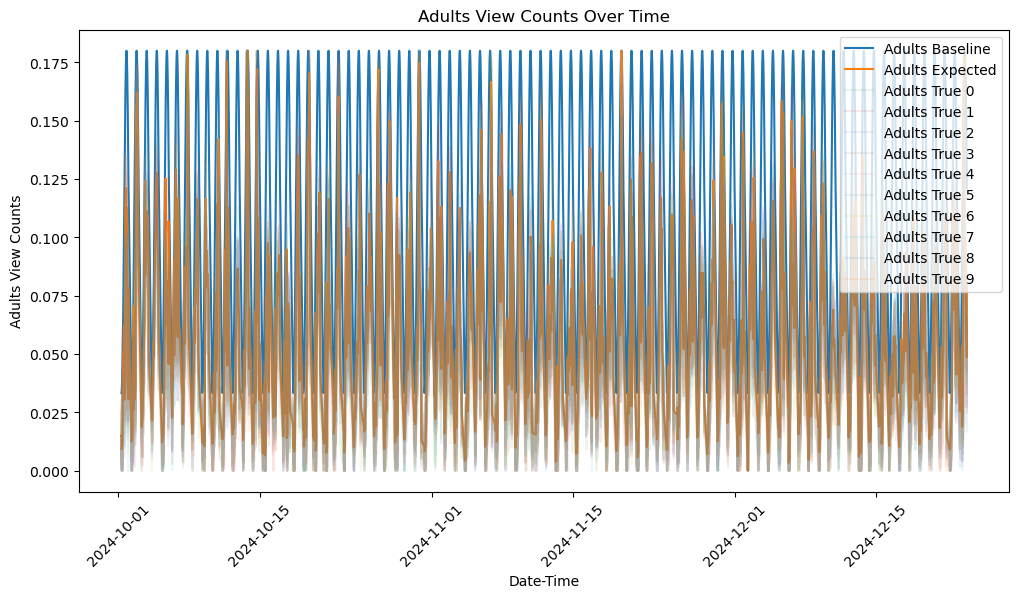

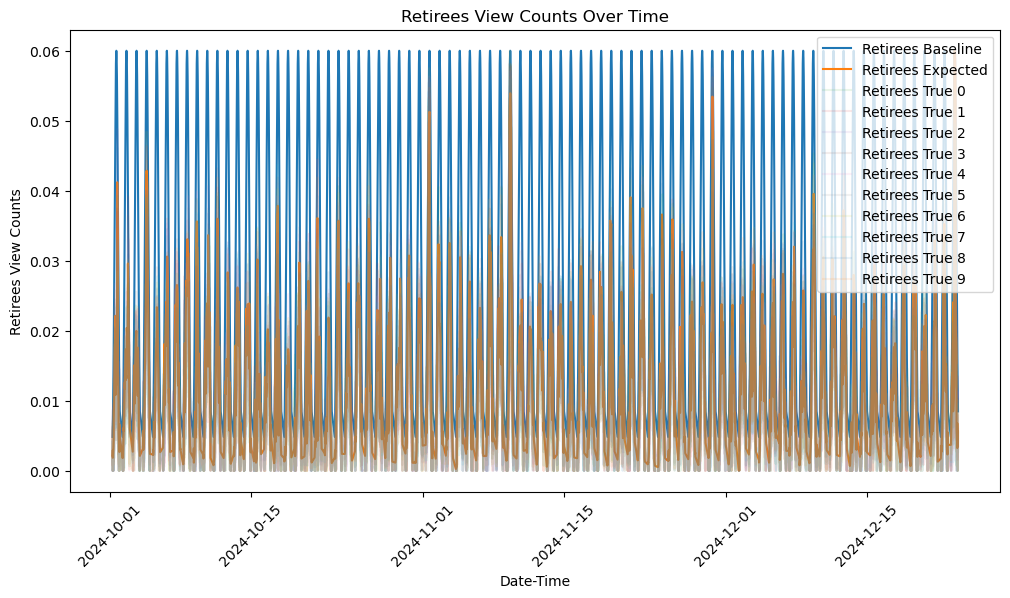

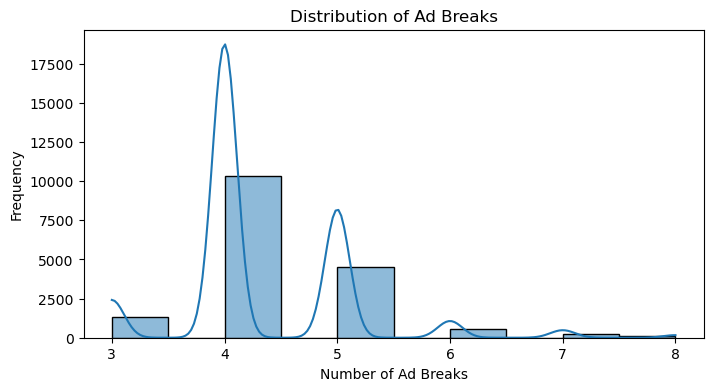

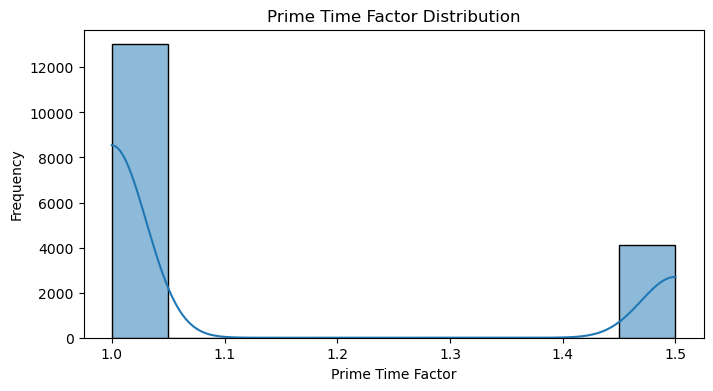

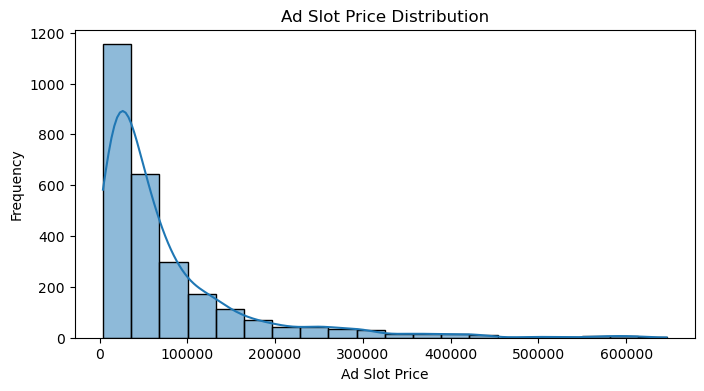

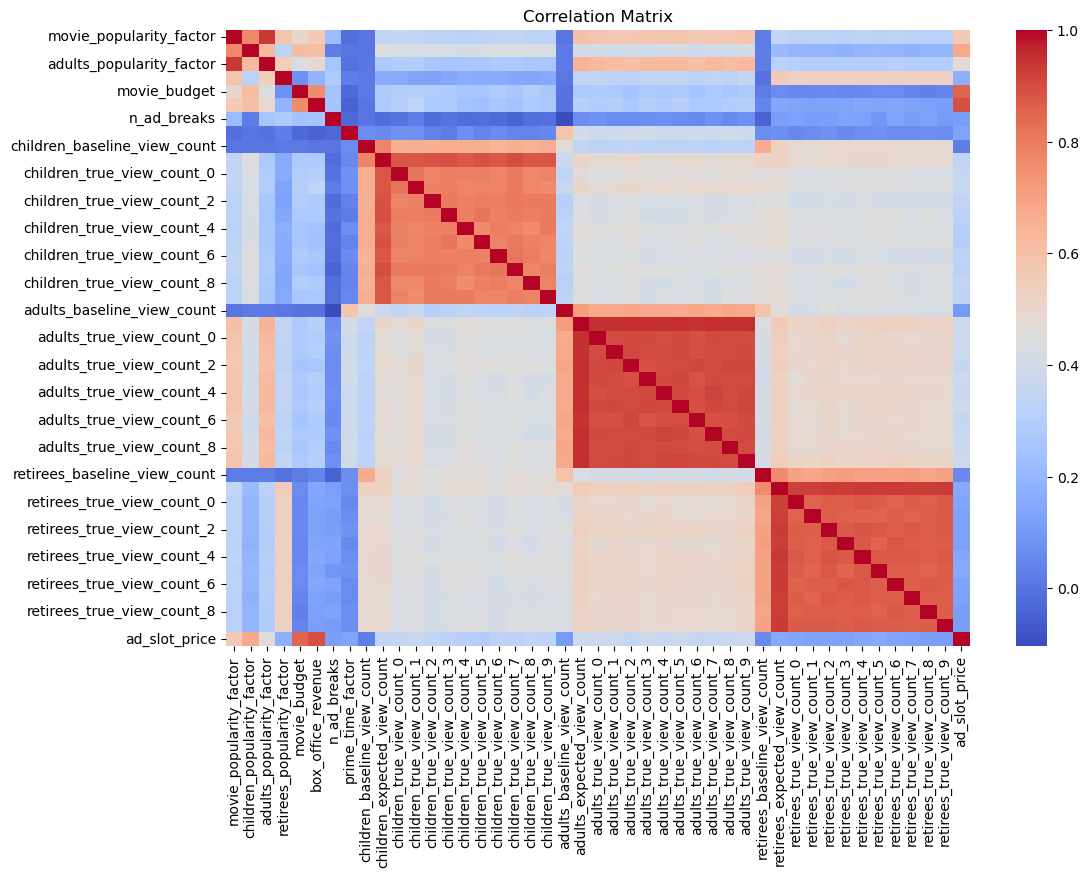

Number of Movies: 14460
Number of Adverts: 2676
Ratio of Adverts to Movies: 0.19

Analysis Complete.


In [19]:
analyze_channel_schedule("data/channel_1_schedule.csv")


First few rows of the dataset:
            Date-Time     content content_type  movie_popularity_factor  \
0 2024-10-01 07:00:00  Inside Out        Movie                      1.0   
1 2024-10-01 07:05:00      Advert       Advert                      1.0   
2 2024-10-01 07:10:00  Inside Out        Movie                      1.0   
3 2024-10-01 07:15:00  Inside Out        Movie                      1.0   
4 2024-10-01 07:20:00  Inside Out        Movie                      1.0   

   children_popularity_factor  adults_popularity_factor  \
0                         0.8                       0.8   
1                         0.8                       0.8   
2                         0.8                       0.8   
3                         0.8                       0.8   
4                         0.8                       0.8   

   retirees_popularity_factor  movie_budget  box_office_revenue  n_ad_breaks  \
0                         0.8   175000000.0         857611174.0          4.0   
1 

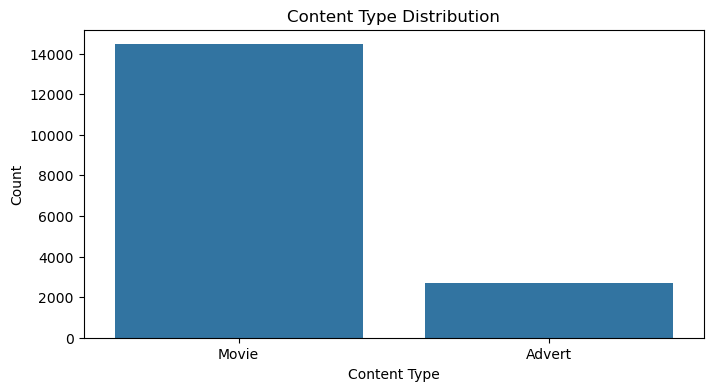

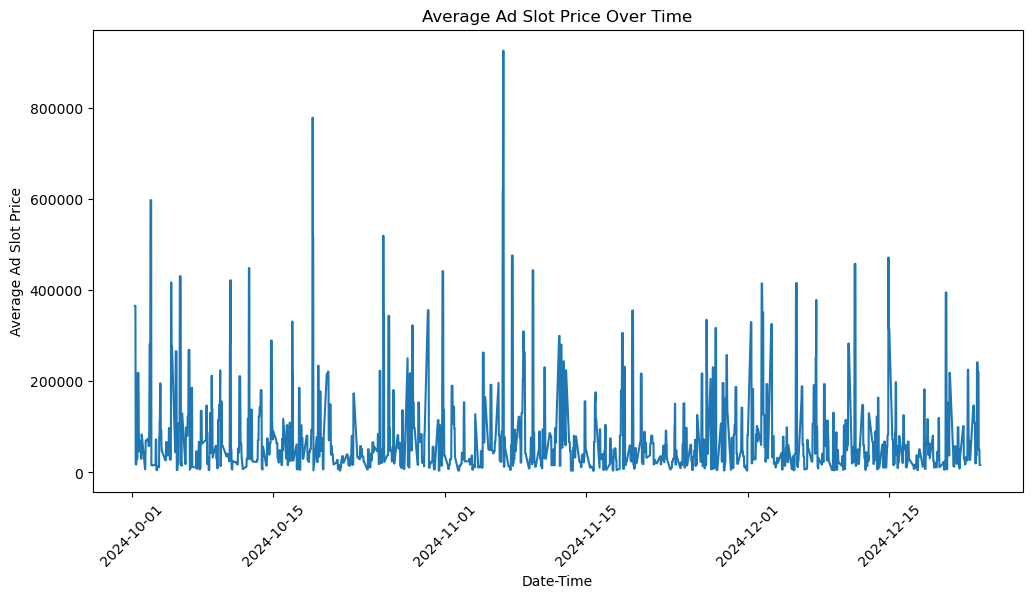

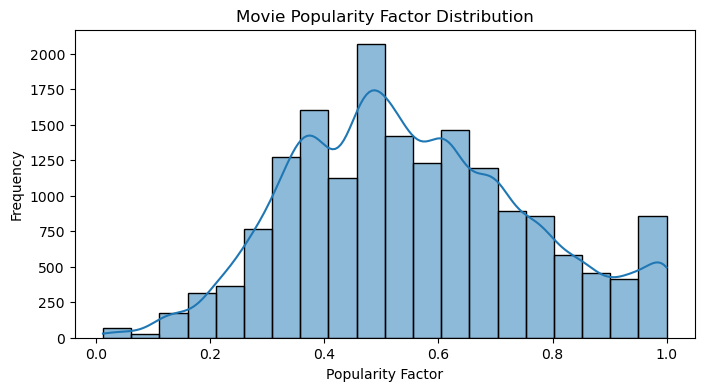

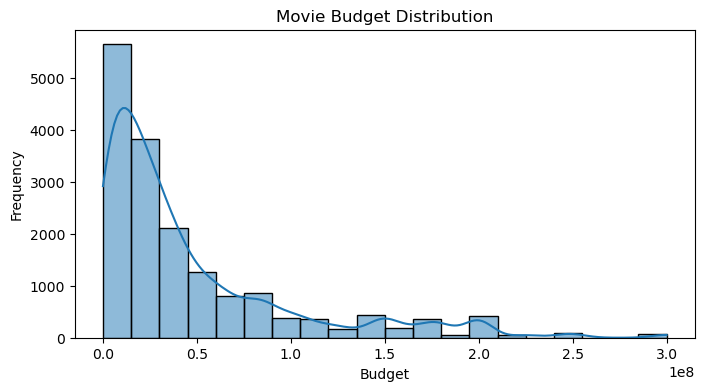

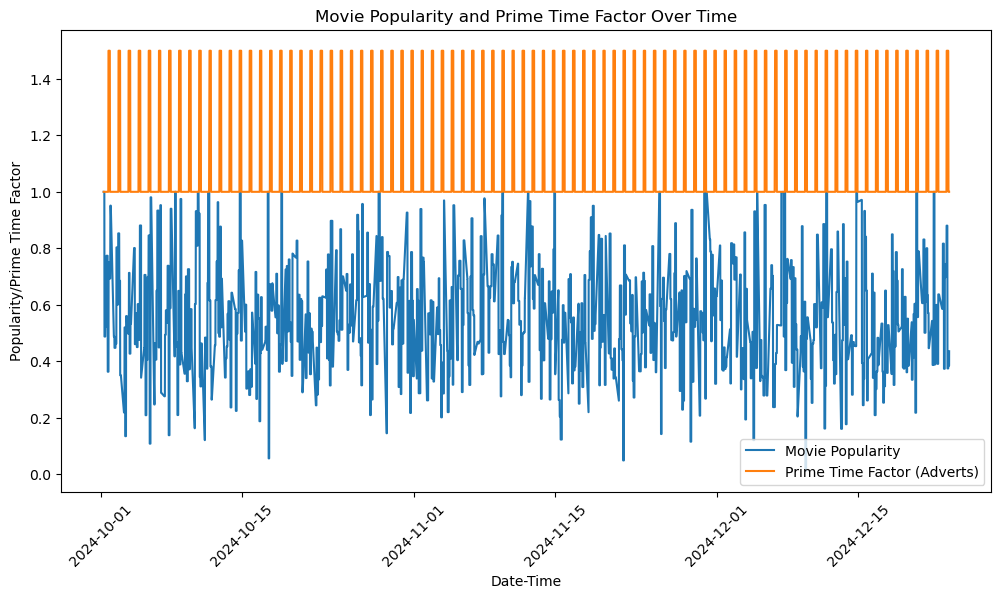

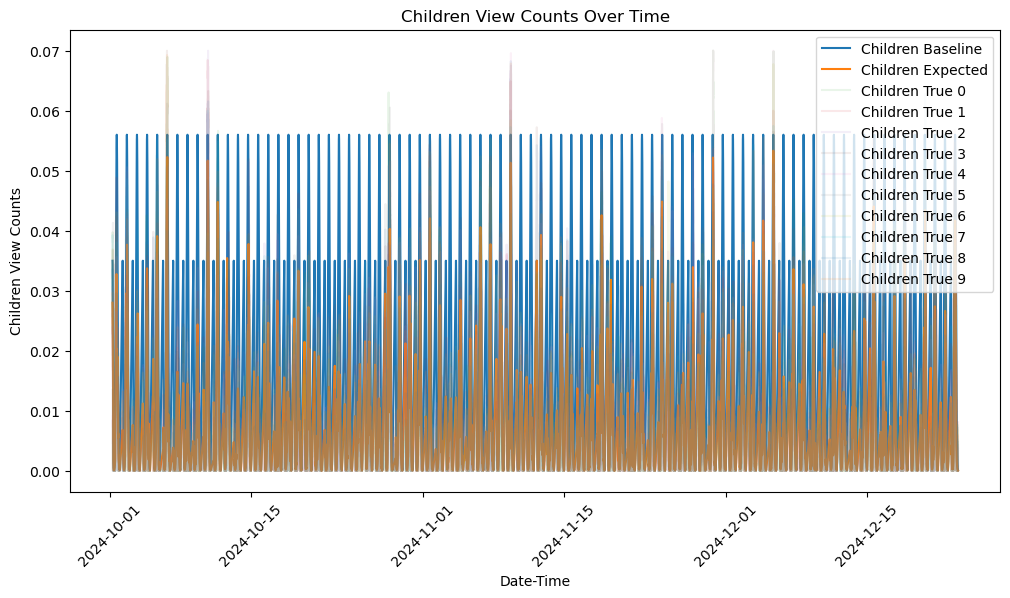

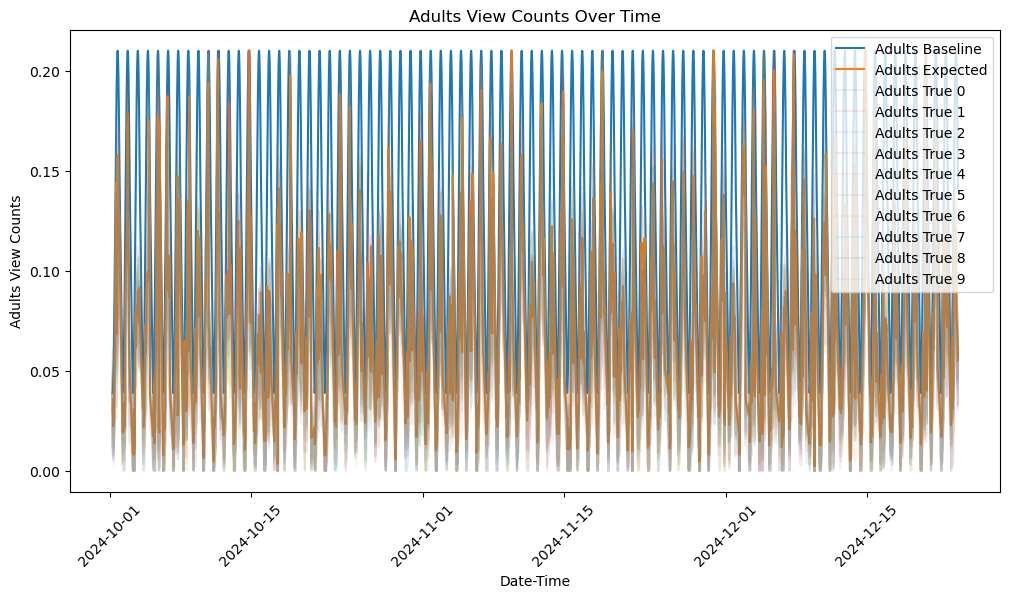

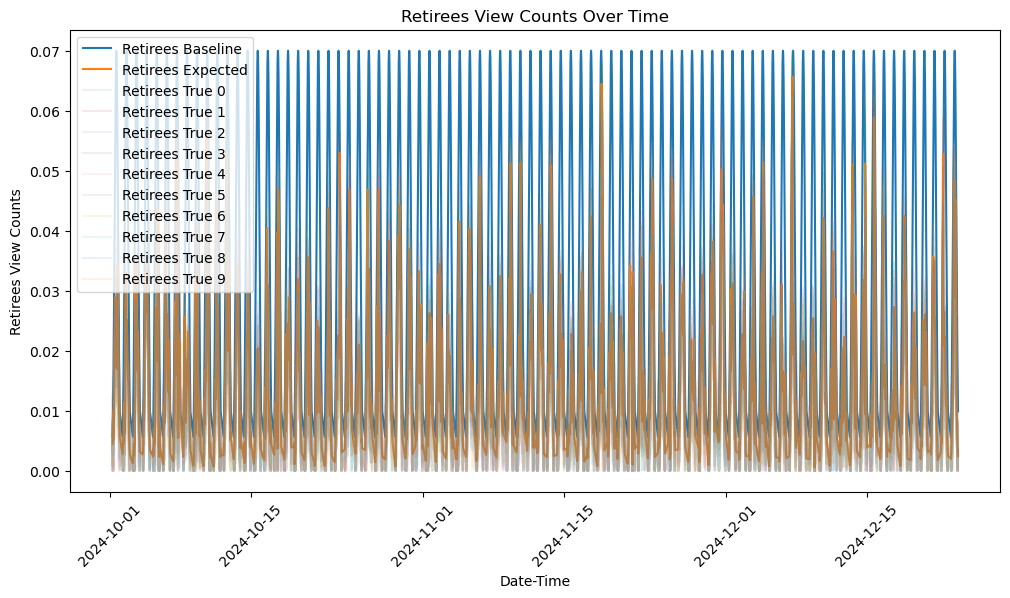

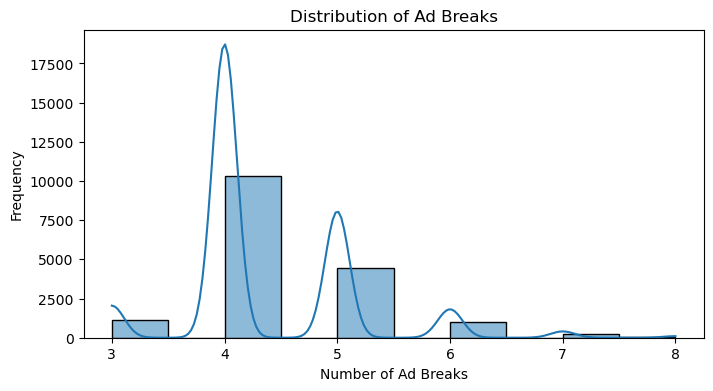

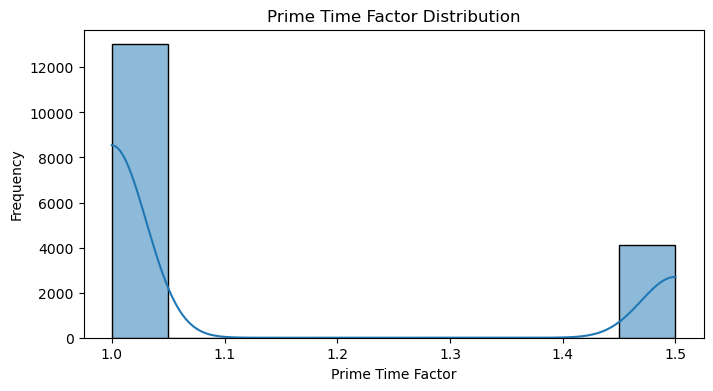

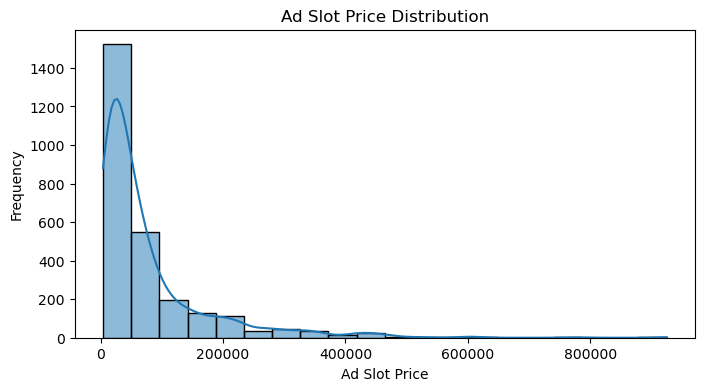

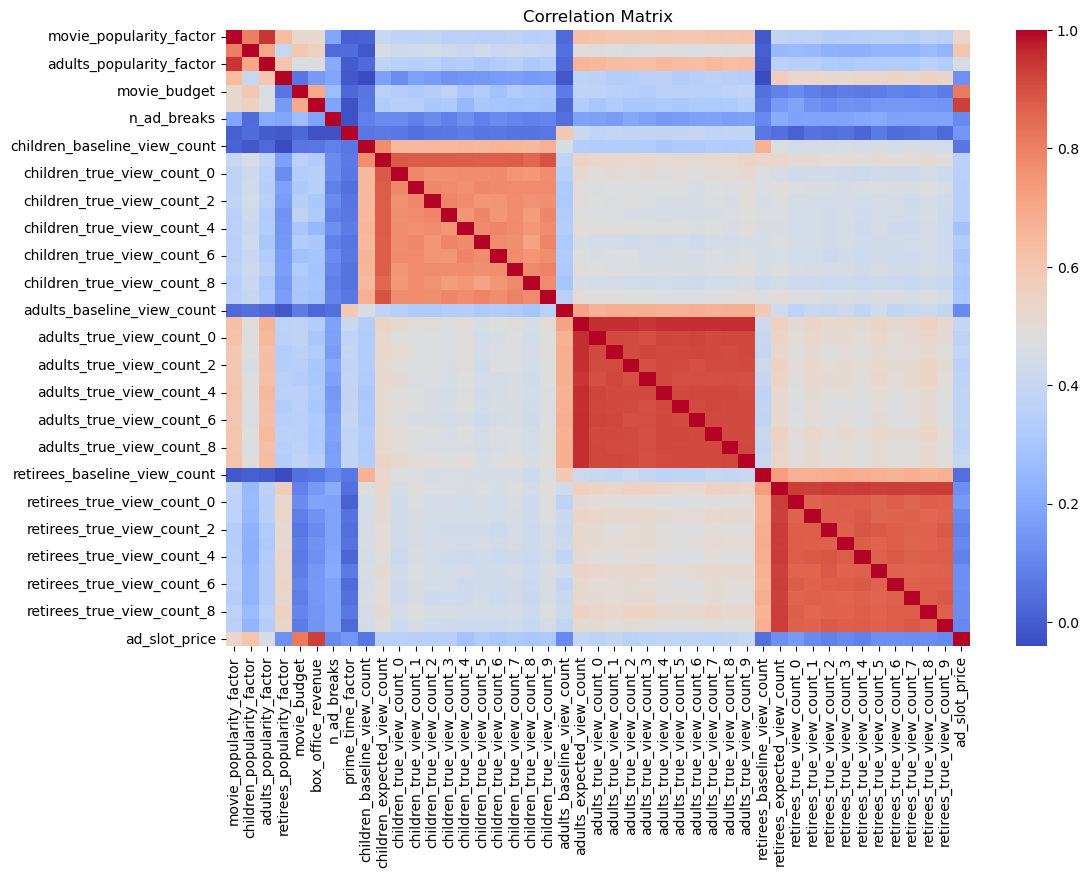

Number of Movies: 14452
Number of Adverts: 2684
Ratio of Adverts to Movies: 0.19

Analysis Complete.


In [20]:
analyze_channel_schedule("data/channel_2_schedule.csv")